# TP - Etude numérique du pendule simple

$$\frac{d^2\theta}{dt^2}+\omega^2\sin\theta=0$$

### a. Méthode d'Euler et `odeint`
---

1. On pose $v=\frac{d\theta}{dt}$, on a alors le système d'équations suivant :

$$
\begin{cases}
        \frac{d\theta}{dt} = v \\
        \frac{dv}{dt} = -\omega^2 \sin(\theta)
    \end{cases}
$$

2. Intervalle de résolution : $[0, 6\tau]$

3. Implémentation python :

In [ ]:
import numpy as np

omega = 1

def Euler2(N: int, a: int, b: int, x0: float, v0: float) -> tuple[list]:
    h = (b - a) / (N - 1)

    Lx = [x0]
    Lv = [v0]
    Lt = [a]

    for t in range(N):
        Lx.append(Lx[t] + Lv[t] * h)
        Lv.append(Lv[t] - h * (omega ** 2 * np.sin(Lx[t])))
        Lt.append(Lt[t] + h)

    return Lx, Lv, Lt

4 et 5. Résolutions $(1)$ et $(2)$ en deux programmes séparés :

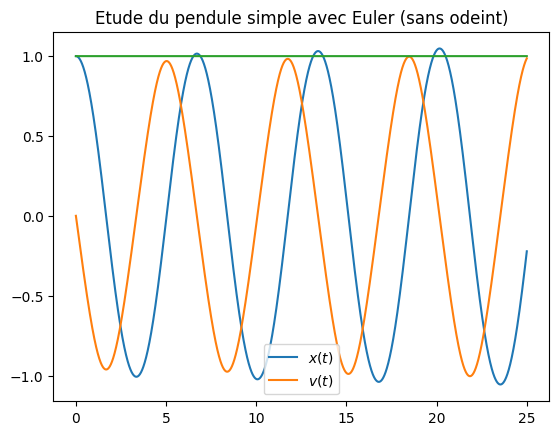

In [ ]:
import matplotlib.pyplot as plt

# 1.

N = 5000
a, b = 0, 25
x0, v0 = 1.0, .0

Lx, Lv, Lt = Euler2(N, a, b, x0, v0)
plt.plot(Lt, Lx, label = r'$x(t)$')
plt.plot(Lt, Lv, label = r'$v(t)$')
plt.plot(Lt, [1.0] * len(Lt))

plt.legend(loc = 'best')
plt.title('Etude du pendule simple avec Euler (sans odeint)')
plt.show()

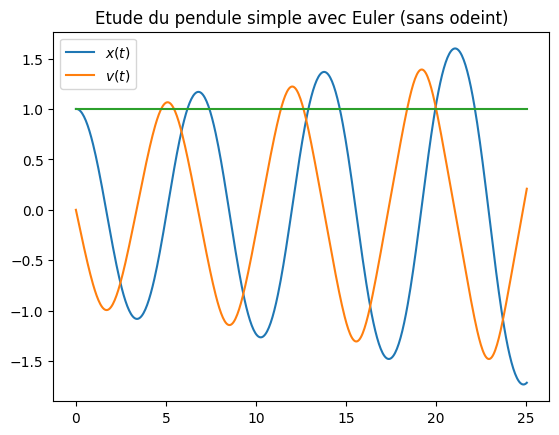

In [ ]:
# 2.

N = 500
a, b = 0, 25
x0, v0 = 1, 0

Lx, Lv, Lt = Euler2(N, a, b, x0, v0)
plt.plot(Lt, Lx, label = r'$x(t)$')
plt.plot(Lt, Lv, label = r'$v(t)$')
plt.plot(Lt, [1.0] * len(Lt))

plt.legend(loc = 'best')
plt.title('Etude du pendule simple avec Euler (sans odeint)')
plt.show()

Conclusion : le graphe constitué de $500$ points au lieu de $5000$ diverge plus vite.

6. Résolution avec `odeint` (programme principal, puis les deux résolutions en deux programmes séparés) :

In [ ]:
from scipy.integrate import odeint
import numpy as np

def f(X, t):
    return [X[1], -omega ** 2 * np.sin(X[0])]

def Ode(f, N, x0, v0, a, b,
            d: bool = True, # d correspond à l'affichage ou non de la dérivée.
            line: bool = False, # affiche ou non une droite d'eq. y = x0.
            title: str = 'Etude du pendule simple avec odeint.'
          ):

    t = np.linspace(a, b, N)
    sol = odeint(f, (x0, v0), t)
    x = [el[0] for el in sol]

    plt.plot(t, x, label = r'$x_{' + str(x0) + r'}(t)$')

    if d:
        v = [el[1] for el in sol]
        plt.plot(t, v, label = rf'$v(t)$')

    if line:
        plt.plot(t, [x0] * len(t))

    plt.legend(loc = 'best')
    plt.title(title)

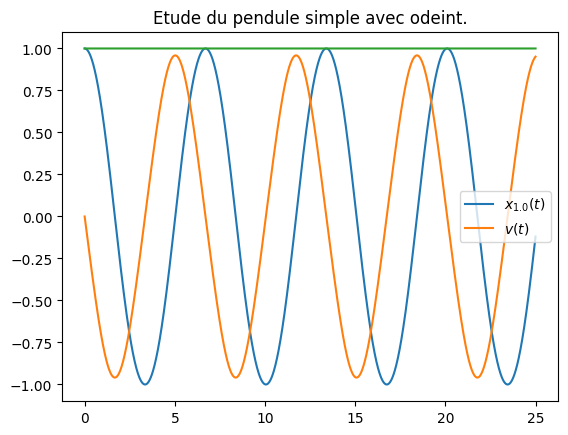

In [ ]:
# 1.

N = 5000
a, b = 0, 25
x0, v0 = 1.0, .0

Ode(f, N, x0, v0, a, b, line = True)
plt.show()

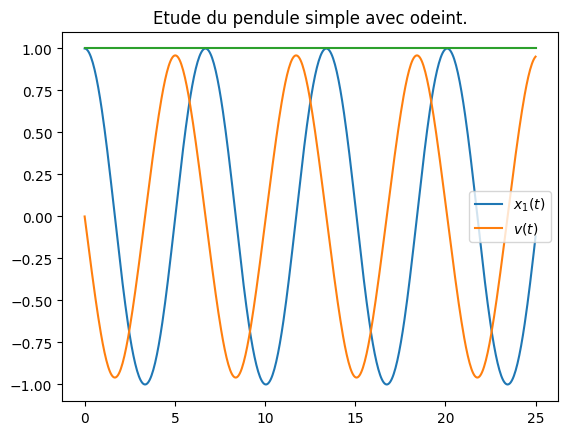

In [ ]:
# 2.

N = 500
a, b = 0, 25
x0, v0 = 1, 0

Ode(f, N, x0, v0, a, b, line = True)
plt.show()

Conclusion : Les deux graphes ci-dessus sont les mêmes, ce qui est normal puisque odeint fonctionne tout le temps.

### b. Comparaison à l'oscillateur harmonique
---

7. On lance Euler pour $\theta_0 = 3$

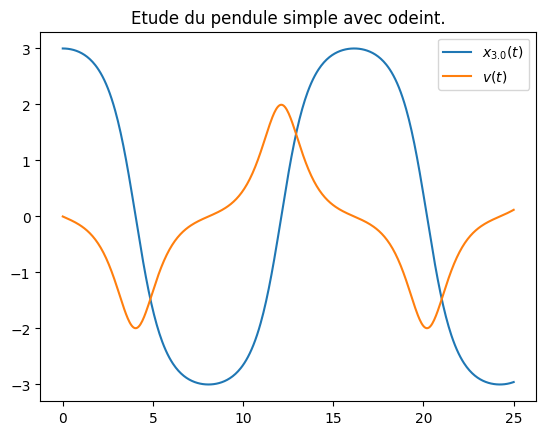

In [ ]:
N = 500
a, b = 0, 25
x0, v0 = 3., 0.

Ode(f, N, x0, v0, a, b)
plt.show()

La solution ne peut pas être sinusoïdale car la courbe ne correspond pas à un sinus, sa dérivée n'est pas non plus un sinus.

8 et 9. On utilise `Ode` pour différentes positions initiales.
Pour la solution approchée, on prend $\sin\theta\sim\theta$ :

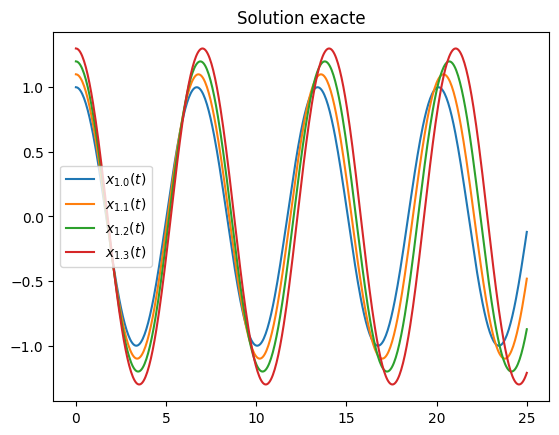

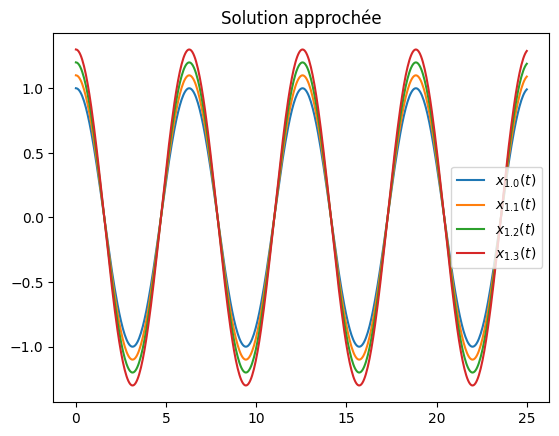

In [ ]:
def f2(X, t):
    return [X[1], -omega ** 2 * X[0]]

# Solution exacte
for i in range(4):
    x0, v0 = .1 * i + 1, 0
    a, b = 0, 25

    Ode(f, 500, x0, v0, a, b, d = False, title = 'Solution exacte')

plt.show()

# Solution approchée
for i in range(4):
    x0, v0 = .1 * i + 1, 0
    a, b = 0, 25

    Ode(f2, 500, x0, v0, a, b, d = False, title = 'Solution approchée')

plt.show()

On constate que sur un cout intervalle de temps la solution approchée convient.

### c. Etude de la période
#### Méthode d'intégration numérique (rectangles)

In [ ]:
# Fonction de calcul d'intégrale pour une fonction f.

def integrate_rect(f, a: float, b: float, n: int) -> float:
    A = 0
    h = (b - a) / n
    for i in range(n):
        A += f(a + i * h) * h
    return A

print(integrate_rect(lambda x : x * x, 0, 1, 20000)) # Réponse théorique : 1/3, ce qui correspond.

0.3333083337500001


<ipython-input-17-a93612bde619>:9: RuntimeWarning: invalid value encountered in sqrt
  f = lambda theta : 1 / np.sqrt(np.cos(theta) - np.cos(theta0)),


Text(0.5, 1.0, 'Période $T$ en fonction de $\\theta_0$')

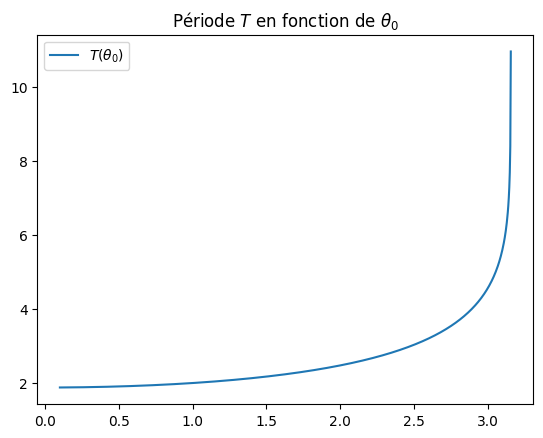

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# En utilisant la fonction crée ci-dessus :

def periodeRect(theta0: float, g: float, l: float, n: int) -> float:
    return 4 * np.sqrt(l / (2 * g)) \
        * integrate_rect(
            f = lambda theta : 1 / np.sqrt(np.cos(theta) - np.cos(theta0)),
            a = 0,
            b = theta0,
            n = n
        )

# Courbe de T en fonction de theta0 :

g, l = 9.8, 1.0
N = 100

Ltheta0 = np.linspace(.1, 3.5, 1000)
LT = np.array([periodeRect(Ltheta0[i], g, l, N) for i in range(1000)])

plt.plot(Ltheta0, LT, label = r'$T(\theta_0)$')
plt.legend(loc = 'best')
plt.title(r'Période $T$ en fonction de $\theta_0$')

Lorsque $\theta_0$ tend vers $0$, cela correspond à un oscilateur harmonique.

In [29]:
def dichotomie() -> float:
    """ H : t trié ;
    Renvoie la première valeur de theta0 pour laquelle T diffère de T_th à moins de 1%. """
    theta0 = 1.5
    T = periodeRect(theta0, g, l, N) # valeurs définies dans le bloc prédécent.
    T_th = 2.05
    while T / T_th >= 0.01:
        theta0 -= 0.05
        T = periodeRect(theta0, g, l, N)
    return theta0

print(dichotomie())

-7.632783294297951e-16


<ipython-input-17-a93612bde619>:9: RuntimeWarning: divide by zero encountered in scalar divide
  f = lambda theta : 1 / np.sqrt(np.cos(theta) - np.cos(theta0)),
